In [6]:
import numpy
import matplotlib.pyplot as plt 
import pandas
import mglearn
import scipy

import sklearn
import sklearn.ensemble  # import seperatley otherwise sub module won't be imported
import sklearn.neural_network # import seperatley otherwise sub module won't be imported
from sklearn.cluster import KMeans

import graphviz
import mpl_toolkits.mplot3d as plt3dd

## KMean clustering

In [9]:
people = sklearn.datasets.fetch_lfw_people(min_faces_per_person=20, resize = 0.7);
image_shape = people.images[0].shape;
mask = numpy.zeros(people.target.shape, dtype = bool);

for target in numpy.unique(people.target):
    mask[numpy.where(people.target == target)[0][:50]] = 1;

X_people = people.data[mask];
y_people = people.target[mask];

X_people /= 255;

In [11]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_people, y_people, stratify=y_people, random_state=0);

nmf = sklearn.decomposition.NMF(n_components=100, random_state=0, max_iter=1500);
pca = sklearn.decomposition.PCA(n_components=100, random_state=0);
kmeans = sklearn.cluster.KMeans(n_clusters=100, random_state=0, max_iter=1500);

X_train_nmf = nmf.fit_transform(X_train);
X_train_pca = pca.fit_transform(X_train);
X_train_km = kmeans.fit_transform(X_train);

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test));
X_reconstructed_kmean = kmeans.cluster_centers_[kmeans.predict(X_test)];
X_reconstructed_nmf = numpy.dot(nmf.transform(X_test), nmf.components_)

B:\Anaconda\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1500 reached. Increase it to improve convergence.
  warnings.warn(
B:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Axes : (5, 3)
Cluster means : (100, 5655)
PCA comp : (100, 5655)
NMF como : (100, 5655)


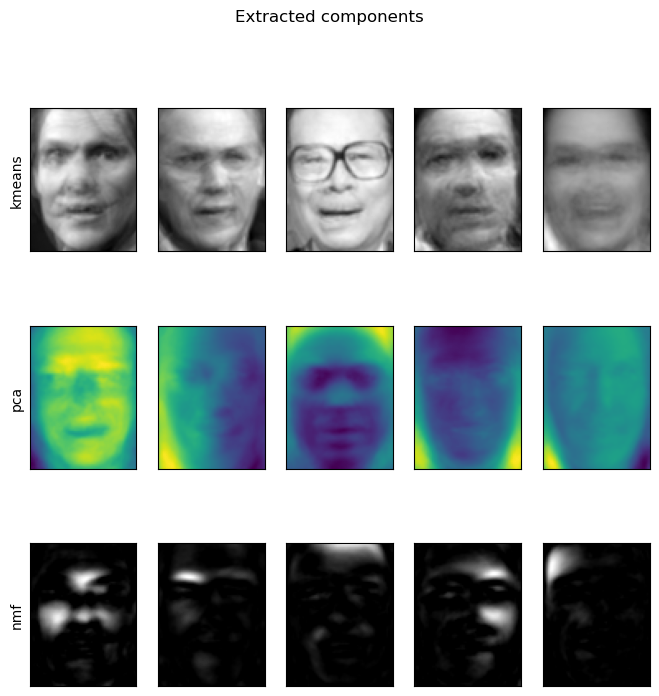

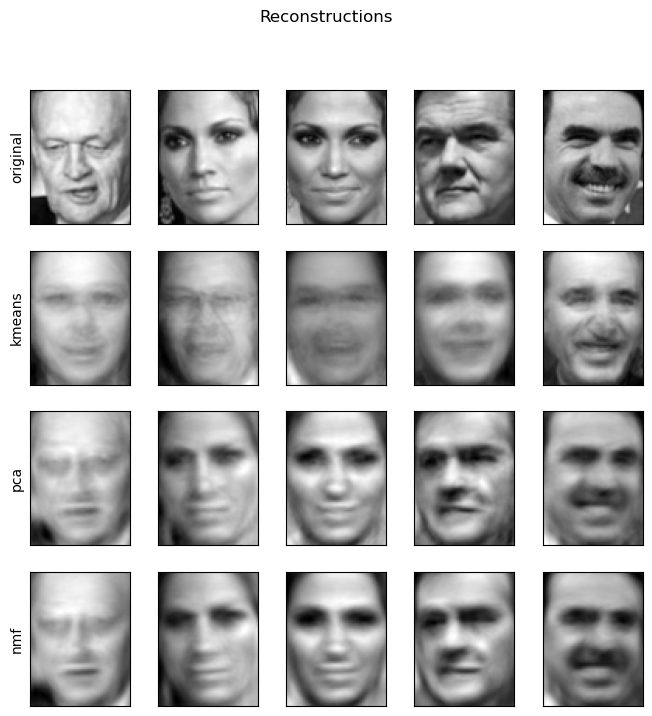

In [4]:

# Extracted components
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()});
fig.suptitle("Extracted components");

for (ax, comp_kmeans, comp_pca, comp_nmf) in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape), cmap='grey');
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis');
    ax[2].imshow(comp_nmf.reshape(image_shape), cmap = 'grey');

axes[0, 0].set_ylabel("kmeans");
axes[1, 0].set_ylabel("pca");
axes[2, 0].set_ylabel("nmf");


#
print("Axes : {}\nCluster means : {}\nPCA comp : {}\nNMF como : {}".format(
    axes.T.shape, kmeans.cluster_centers_.shape, pca.components_.shape, nmf.components_.shape
)); 





# Reconstructions
fig, axes = plt.subplots(4, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()});
fig.suptitle("Reconstructions");

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmean, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape), cmap='grey');
    ax[1].imshow(rec_kmeans.reshape(image_shape), cmap='grey');
    ax[2].imshow(rec_pca.reshape(image_shape), cmap='grey');
    ax[3].imshow(rec_nmf.reshape(image_shape), cmap='grey');

axes[0, 0].set_ylabel("original");
axes[1, 0].set_ylabel("kmeans");
axes[2, 0].set_ylabel("pca");
axes[3, 0].set_ylabel("nmf");

C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


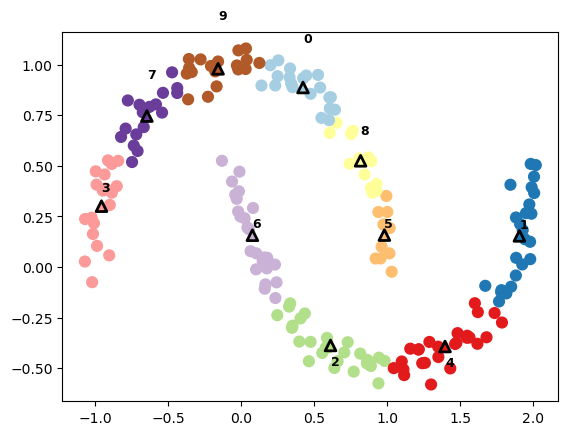

In [40]:

X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.05, random_state=0 );
kmeans = sklearn.cluster.KMeans(n_clusters=10, random_state=0).fit(X);
y_pred = kmeans.predict(X);


plt.scatter(X[:,0],X[:,1], c=y_pred, s=60, cmap='Paired');
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=60, marker='^', c=range(kmeans.n_clusters),linewidth=2, cmap='Paired',edgecolors='k');
for i in range(10):
    plt.text(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1]*1.25, str(i),
             fontdict={'weight': 'bold', 'size': 9});

In [10]:
distance_features = kmeans.transform(X);
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.53664613 1.15017588 0.93237626 ... 1.48034956 0.002907   1.07736639]
 [1.74138152 0.60592307 1.00666225 ... 2.52921971 1.20779969 2.23716489]
 [0.75710543 1.93145038 0.91586549 ... 0.78321505 0.87573753 0.71838465]
 ...
 [0.9274342  1.73811046 0.57899268 ... 1.11471941 0.83358544 1.04125672]
 [0.3227627  1.97647071 1.47861069 ... 0.81425026 0.84551232 0.28446737]
 [1.63322944 0.47226506 1.02289983 ... 2.46626118 1.09767675 2.14812753]]


## Agglomerative clustering

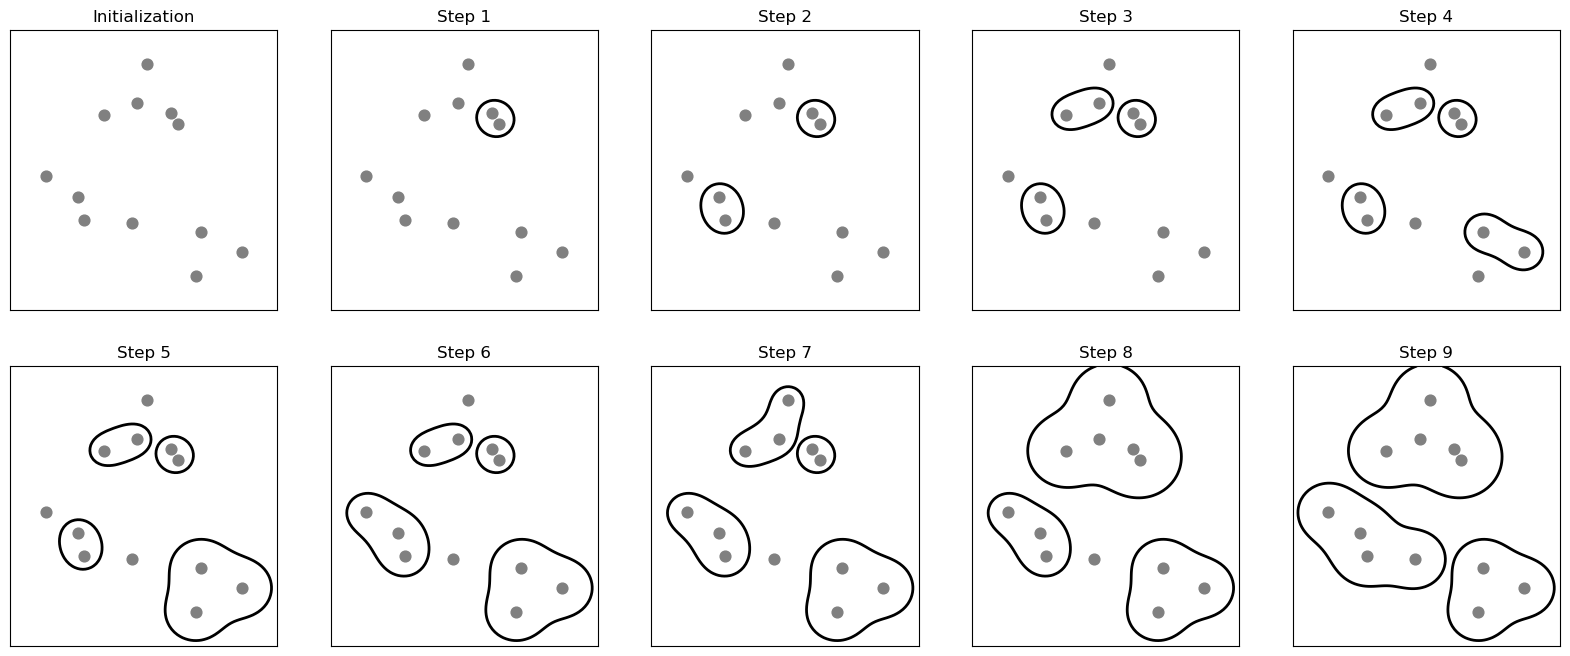

In [11]:
mglearn.plots.plot_agglomerative_algorithm();

Text(0, 0.5, 'Feature 1')

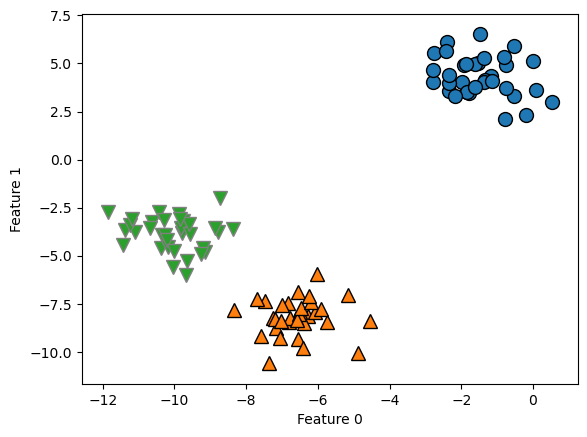

In [54]:
X, y = sklearn.datasets.make_blobs(random_state=1);
agg = sklearn.cluster.AgglomerativeClustering(n_clusters=3);
assignment = agg.fit_predict(X);
mglearn.discrete_scatter(X[:,0], X[:,1], assignment);
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [57]:
X, y = sklearn.datasets.make_blobs(random_state=0, n_samples=12);
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering

linkage_array = scipy.cluster.hierarchy.ward(X);

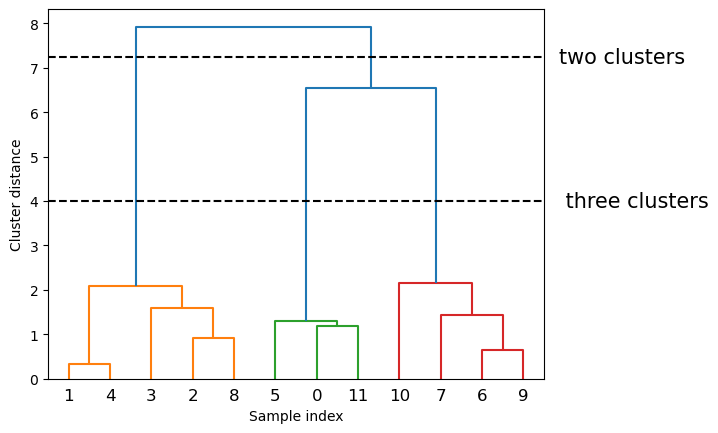

In [69]:
scipy.cluster.hierarchy.dendrogram(linkage_array);
ax = plt.gca();
bounds = ax.get_xbound();
ax.plot(bounds, [7.25, 7.25],'--',c='k');
ax.plot(bounds, [4,4],'--',c='k');
ax.text(bounds[1]*1.03, 7.25, 'two clusters',va='center', fontdict={'size':15});
ax.text(bounds[1]*1.03, 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index");
plt.ylabel("Cluster distance");

Unfortunately, agglomerative clustering still fails at separating complex shapes like
the two_moons dataset. But the same is not true for the next algorithm we will look at,
DBSCAN.

## DBSCAN

Another very useful clustering algorithm is DBSCAN (which stands for “densitybased
spatial clustering of applications with noise”).

In [91]:
X, y = sklearn.datasets.make_blobs(random_state=0, n_samples=25);
dbscan = sklearn.cluster.DBSCAN(eps=1,min_samples=2);
clusters = dbscan.fit_predict(X);
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[ 0  1  0  0  1  2 -1  0  0  3  3  1  1  0  1  1 -1  2  3  0 -1  1 -1  3
 -1]


In [93]:
cluster_vals

array([-1,  0,  1,  2], dtype=int64)

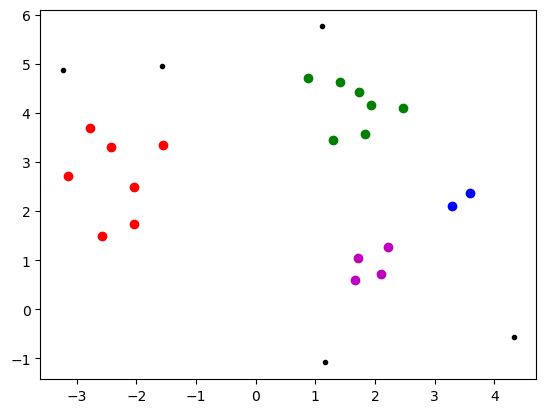

In [99]:
c_dots = ['.k','og','or','ob','om'];
cluster_vals = numpy.unique(clusters);

# plt.plot(X[:,0],X[:,1],'ok',ms=15,mfc='white');

for i in range(cluster_vals.size):
    # print(i)
    log_arr = (clusters == cluster_vals[i]);
    plt.plot(X[log_arr,0],X[log_arr,1],c_dots[i])

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


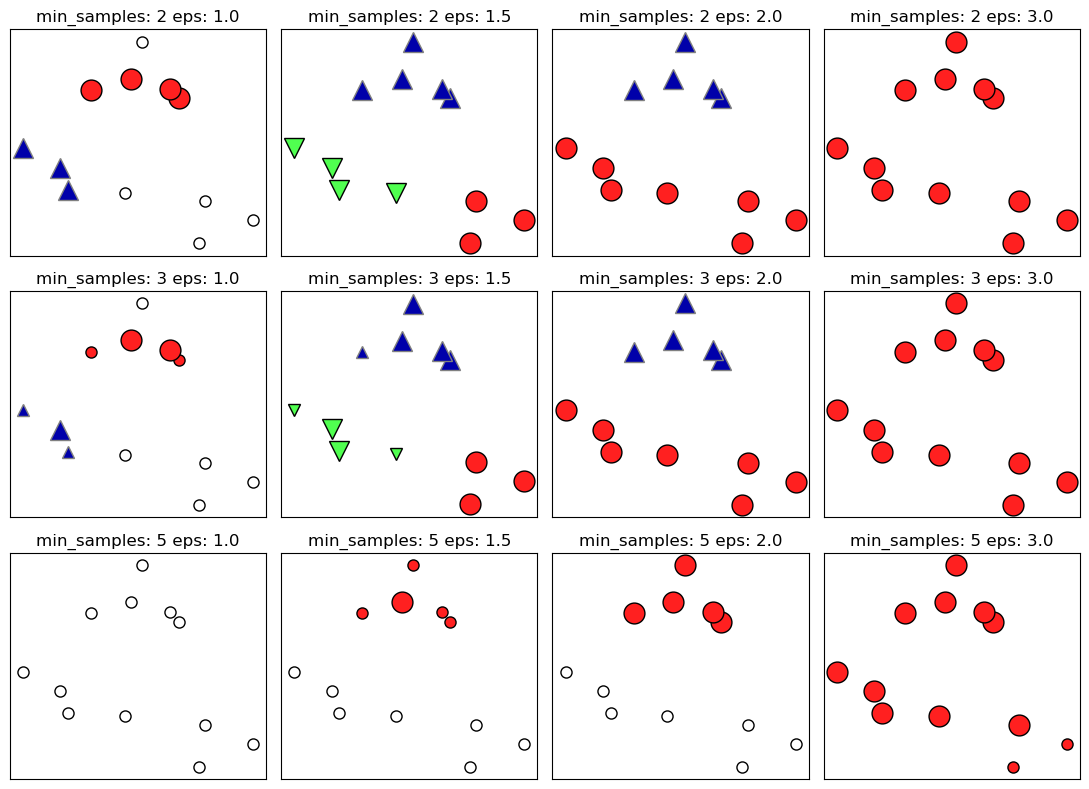

In [15]:
mglearn.plots.plot_dbscan()

In [113]:
numpy.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

Text(0, 0.5, 'Feature 1')

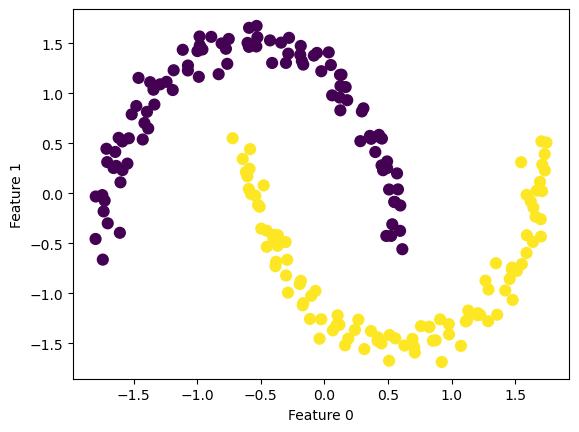

In [115]:
X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.05, random_state=0);


scaler = sklearn.preprocessing.StandardScaler();
X_scaled = scaler.fit_transform(X);


dbscan = sklearn.cluster.DBSCAN(eps=0.5, min_samples=5);
clusters = dbscan.fit_predict(X_scaled);

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Comparing and evaluating clustering algorithms

### Moon datasets

B:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


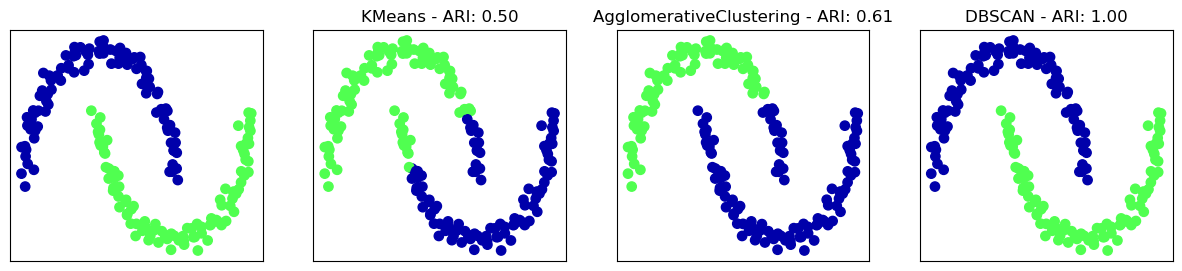

In [158]:
X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.05, random_state=0);

scaler = sklearn.preprocessing.StandardScaler();
X_scaled = scaler.fit_transform(X);


fig, axes = plt.subplots(1, 4, figsize=(15,3),
                        subplot_kw={"xticks":(), "yticks":()} );


# make a list of algorithms to use
algorithms = [ KMeans(n_clusters=2),
               sklearn.cluster.AgglomerativeClustering(n_clusters=2),
               sklearn.cluster.DBSCAN()
             ];

# create a random cluster assignment for reference
random_state = numpy.random.RandomState(seed=0);
random_clusters = random_state.randint(low=0, high=2, size=len(X_scaled)); 


axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=y, cmap=mglearn.cm3, s=45);



for ax, algorithm in zip(axes[1:], algorithms):
    #  plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled);
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=45);
    ax.set_title("{} - ARI: {:0.2f}".format(algorithm.__class__.__name__, 
                                            sklearn.metrics.adjusted_rand_score(y, clusters) ));

A common mistake when evaluating clustering in this way is to use accuracy_score
instead of adjusted_rand_score, normalized_mutual_info_score, or some other
clustering metric. The problem in using accuracy is that it requires the assigned clus‐
ter labels to exactly match the ground truth. 

Although we have just shown one way to evaluate clustering algorithms, in practice,
there is a big problem with using measures like ARI. When applying clustering algo‐
rithms, there is usually no ground truth to which to compare the results. If we knew
the right clustering of the data, we could use this information to build a supervised
model like a classifier. Therefore, using metrics like ARI and NMI usually only helps
in developing algorithms, not in assessing success in an application.

### Faces

In [199]:
people = sklearn.datasets.fetch_lfw_people(min_faces_per_person=20, resize = 0.7);
image_shape = people.images[0].shape;
mask = numpy.zeros(people.target.shape, dtype = bool);

for target in numpy.unique(people.target):
    mask[numpy.where(people.target == target)[0][:50]] = 1;

X_people = people.data[mask];

y_people = people.target[mask];

In [204]:
pca = sklearn.decomposition.PCA(n_components=100, whiten=True, random_state=0);
X_pca = pca.fit_transform(X_people);

In [250]:
eps_vals = numpy.arange(0.5, 13, 0.5);


for eps in eps_vals:
    dbscan = sklearn.cluster.DBSCAN(min_samples=3, eps=eps);
    labels = dbscan.fit_predict(X_pca);
    print("Eps : {}\nunique labels: {}".format(eps, numpy.unique(labels)));
    print("Number of points per cluster: {}\n\n".format(numpy.bincount(labels+1)));


# Count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# The first number in the result corresponds to noise points.
# print("Number of points per cluster: {}".format(numpy.bincount(labels+1)));



Eps : 0.5
unique labels: [-1]
Number of points per cluster: [2063]


Eps : 1.0
unique labels: [-1]
Number of points per cluster: [2063]


Eps : 1.5
unique labels: [-1]
Number of points per cluster: [2063]


Eps : 2.0
unique labels: [-1]
Number of points per cluster: [2063]


Eps : 2.5
unique labels: [-1]
Number of points per cluster: [2063]


Eps : 3.0
unique labels: [-1]
Number of points per cluster: [2063]


Eps : 3.5
unique labels: [-1]
Number of points per cluster: [2063]


Eps : 4.0
unique labels: [-1]
Number of points per cluster: [2063]


Eps : 4.5
unique labels: [-1]
Number of points per cluster: [2063]


Eps : 5.0
unique labels: [-1  0]
Number of points per cluster: [2059    4]


Eps : 5.5
unique labels: [-1  0]
Number of points per cluster: [2058    5]


Eps : 6.0
unique labels: [-1  0  1]
Number of points per cluster: [2053    7    3]


Eps : 6.5
unique labels: [-1  0  1  2  3  4  5]
Number of points per cluster: [2030    3    7    7    7    6    3]


Eps : 7.0
unique labels

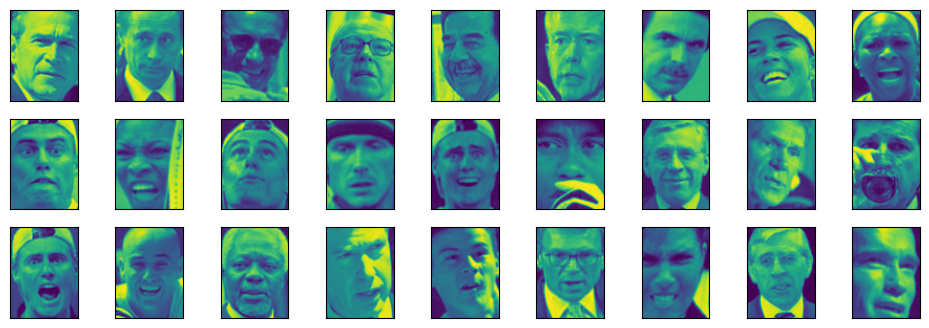

In [238]:
noise = X_people[labels == -1];
fig, axes = plt.subplots( 3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                          figsize=(12, 4));

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)